In [3]:
from google.colab import files
uploaded = files.upload()


Saving accident.csv to accident.csv


<ipython-input-4-eac3ffce667a>:11: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accident.csv')



Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       140
           2       0.39      0.12      0.19      2161
           3       0.77      0.94      0.85      7024

    accuracy                           0.74      9325
   macro avg       0.39      0.36      0.35      9325
weighted avg       0.67      0.74      0.68      9325


Confusion Matrix:
[[   0   25  115]
 [   2  269 1890]
 [   3  395 6626]]


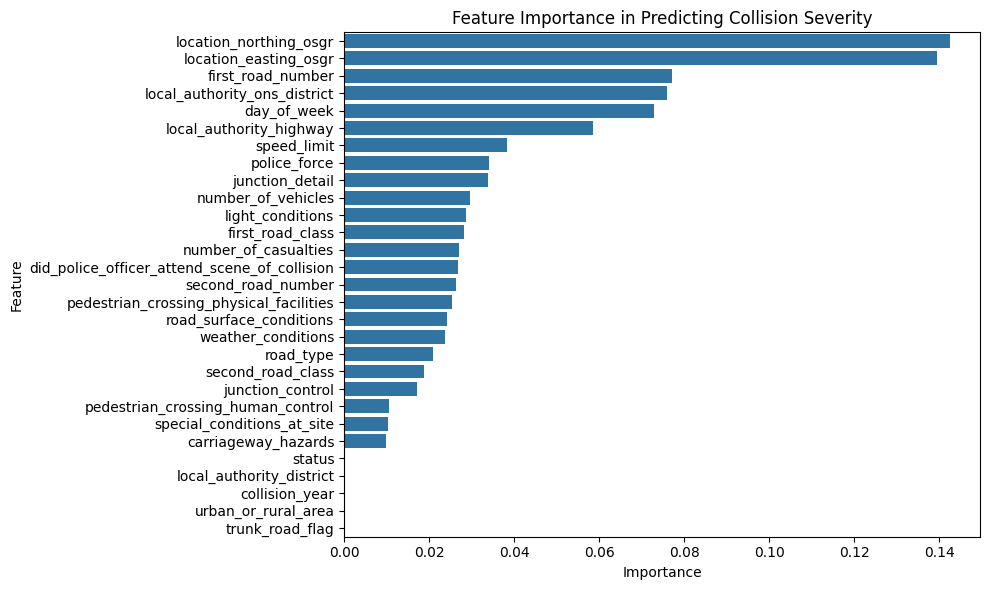

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load the dataset

df = pd.read_csv('accident.csv')

# 2. Drop irrelevant or high-NaN columns
df = df.drop(columns=[
    'collision_index', 'collision_reference', 'date', 'time', 'longitude', 'latitude',
    'lsoa_of_collision_location', 'enhanced_severity_collision'  # drop low quality columns
], errors='ignore')

df = df.dropna()  # Remove rows with any missing values

# 3. Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Define features and target
target_column = 'legacy_collision_severity'
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 9. Feature Importance Visualization
importances = model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Feature Importance in Predicting Collision Severity')
plt.tight_layout()
plt.show()



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import folium
import plotly.express as px


In [5]:

df = pd.read_csv("accident.csv")
print(df.shape)
df.head()


(46707, 38)


<ipython-input-5-2322334e4cde>:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("accident.csv")


,status,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location,enhanced_severity_collision
0,Unvalidated,2024010000000.0,2024,10486807,527188.0,184782.0,NaN,NaN,1,3,...,4,1,1,0,0,-1,3,-1,-1,-1
1,Unvalidated,2024010000000.0,2024,10486821,528936.0,194721.0,NaN,NaN,1,3,...,4,4,2,9,0,-1,3,-1,-1,-1
2,Unvalidated,2024010000000.0,2024,10486824,552699.0,185940.0,NaN,NaN,1,3,...,4,8,2,0,0,-1,1,-1,-1,-1
3,Unvalidated,2024010000000.0,2024,10486825,545623.0,177185.0,NaN,NaN,1,3,...,4,1,1,0,0,-1,1,-1,-1,-1
4,Unvalidated,2024010000000.0,2024,10486828,536554.0,178468.0,NaN,NaN,1,3,...,4,4,2,0,0,-1,1,-1,-1,-1


In [7]:
# Combine 'date' and 'time' to create 'Start_Time'
df['Start_Time'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# Now extract time-based features
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)




<ipython-input-14-7d7bfd7a552e>:7: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accident.csv')  # Replace with actual path if needed


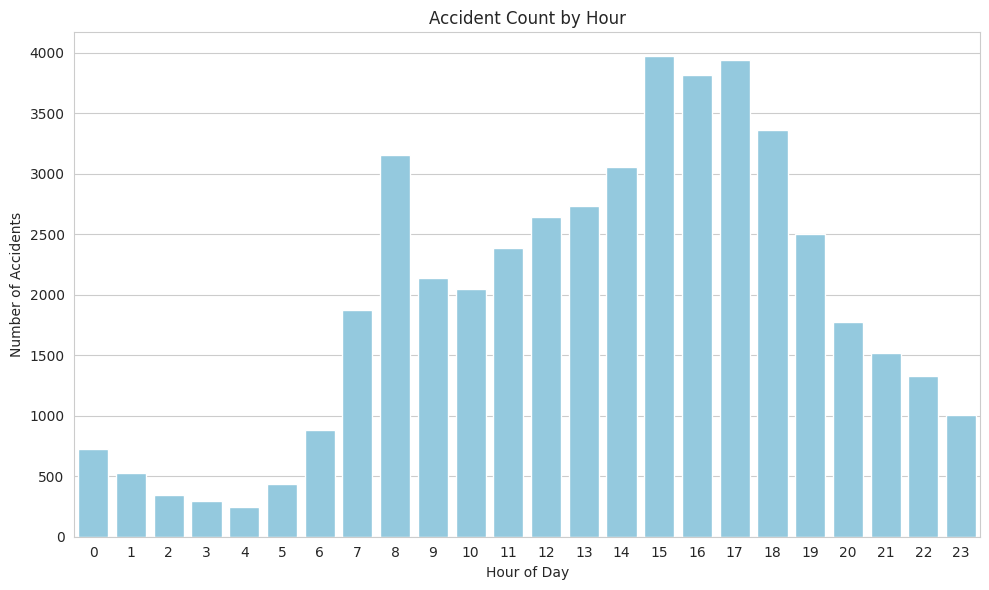

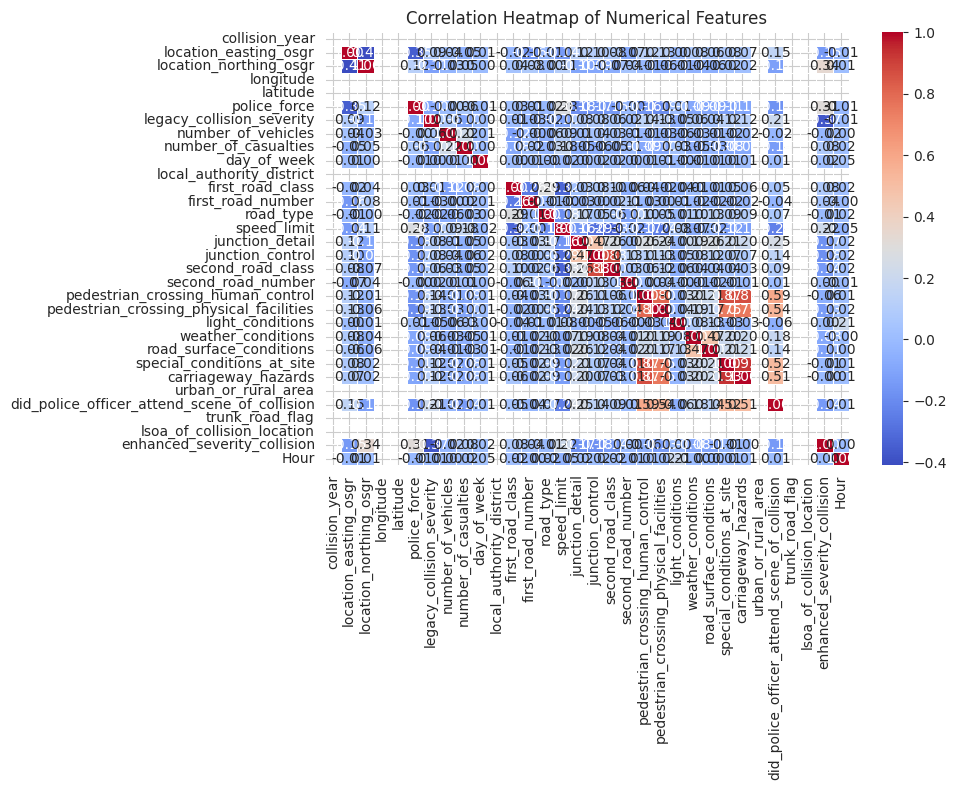

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (use your own path or assume it is already in df)
df = pd.read_csv('accident.csv')  # Replace with actual path if needed

# Convert 'time' column to datetime and extract hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce')
df['Hour'] = df['time'].dt.hour

# Drop rows with missing or invalid time
df = df.dropna(subset=['Hour'])
df['Hour'] = df['Hour'].astype(int)

# Plot accident count by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, color='skyblue')
plt.title('Accident Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation heatmap of numerical features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Ensure no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Check and print column names for debugging
print("Columns in DataFrame:", df.columns)

# Check if 'Weather_Condition' or any similar column exists
weather_column = None
if 'weather_conditions' in df.columns:
    weather_column = 'weather_conditions'
else:
    print("No weather-related column found. Skipping weather feature.")
    weather_column = None  # Set to None if no weather column is found

# Check for missing values in the categorical columns
categorical_cols = ['legacy_collision_severity']  # Update 'Severity' to 'legacy_collision_severity'
if weather_column:
    categorical_cols.insert(0, weather_column)  # Add the weather column if it exists

# Optional: If you don't have 'Side' column, you can skip or find another column related to the accident type or location.
# For now, I'll assume 'road_type' could be a possible replacement for 'Side'
categorical_cols.append('road_type')  # Adding 'road_type' as a placeholder for 'Side'

missing_values = df[categorical_cols].isnull().sum()
if missing_values.any():
    print(f"Missing values found in the following columns:\n{missing_values}")
    df[categorical_cols] = df[categorical_cols].fillna('Unknown')  # Replace missing values with 'Unknown'

# Initialize LabelEncoder
label_encoders = {}

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all values are strings
    label_encoders[col] = le

# Select features and target
features = ['Hour', 'day_of_week']  # Assuming 'day_of_week' can be used as 'Weekday'
if weather_column:
    features.append(weather_column)  # Add weather-related feature if it exists
features.append('road_type')  # Replacing 'Side' with 'road_type'

target = 'legacy_collision_severity'  # Replacing 'Severity' with 'legacy_collision_severity'

# Check if the selected features and target exist
for col in features + [target]:
    if col not in df.columns:
        raise KeyError(f"'{col}' column is missing from the DataFrame.")

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Check the shape of X and y for debugging
print(f"Feature matrix X shape: {X.shape}")
print(f"Target vector y shape: {y.shape}")



Columns in DataFrame: Index(['status', 'collision_index', 'collision_year', 'collision_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'legacy_collision_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_collision',
       'trunk_road_flag', 'lsoa_of_collision_location',
       'enhanced_severity_collision', 'Hour'],
     

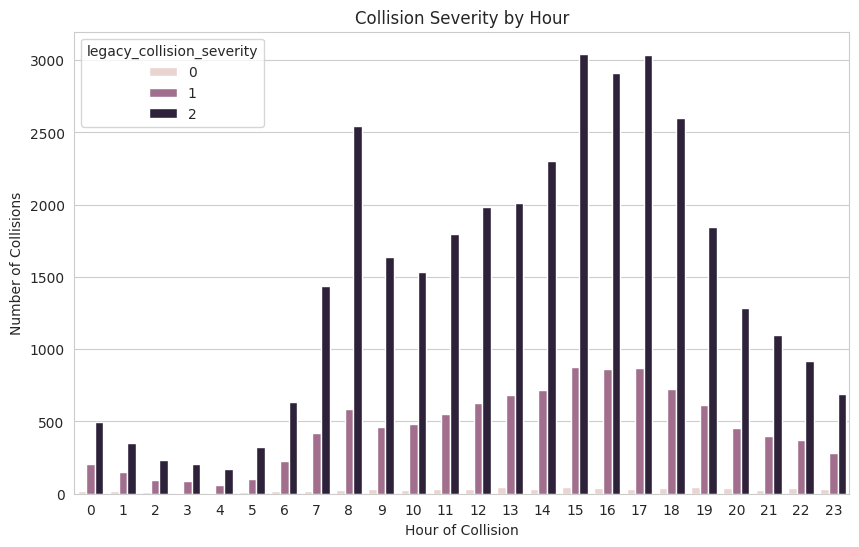

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plot: Severity vs Hour of collision
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Hour', hue='legacy_collision_severity')
plt.title('Collision Severity by Hour')
plt.xlabel('Hour of Collision')
plt.ylabel('Number of Collisions')
plt.show()



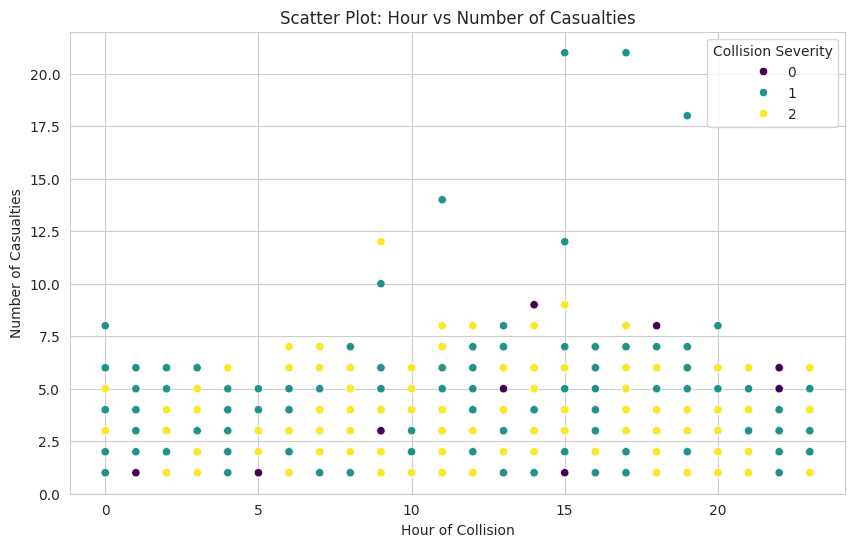

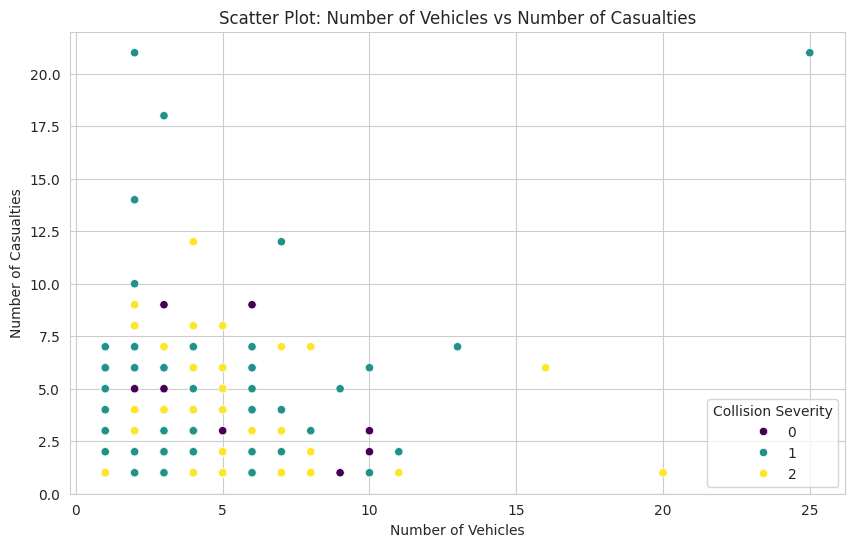

In [32]:
# Scatter Plot between Hour of the collision and Number of casualties
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hour', y='number_of_casualties', hue='legacy_collision_severity', palette='viridis')
plt.title('Scatter Plot: Hour vs Number of Casualties')
plt.xlabel('Hour of Collision')
plt.ylabel('Number of Casualties')
plt.legend(title='Collision Severity')
plt.show()

# Scatter Plot between Number of vehicles and Number of casualties
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_vehicles', y='number_of_casualties', hue='legacy_collision_severity', palette='viridis')
plt.title('Scatter Plot: Number of Vehicles vs Number of Casualties')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')
plt.legend(title='Collision Severity')
plt.show()

